<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Image-Restoration-of-my-grandfather-s-photography/blob/main/Image_Restoration_(Noise_and_Denoising).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
!gdown --id 1bBhVClNLiBaub2NARnO8mYr8vEhObR4Q

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bBhVClNLiBaub2NARnO8mYr8vEhObR4Q
To: /content/IMG_20230525_0001.jpg
100% 1.53M/1.53M [00:00<00:00, 144MB/s]


In [5]:
def uniform_noise(size, prob=0.1):
    '''
    Generates a matrix with uniform noise in the range [0-255] to be added to an image
    
    :param size: tuple defining the size of the noise matrix 
    :param prob: probability for the uniform noise generation 
    :type prob: float
    :return matrix with uniform noise to be added to image
    '''
    
    levels = int((prob * 255) // 2)
    noise = np.random.randint(-levels, levels, size)
    
    return noise

In [6]:
img = imageio.imread("/content/IMG_20230525_0001.jpg")
np.unique(img)

<ipython-input-6-bd0f929977d8>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("/content/IMG_20230525_0001.jpg")


Array([  0,   2,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [7]:
uni_noise = uniform_noise(img.shape, prob=0.1)
img_uni = np.clip(img.astype(int)+uni_noise, 0, 255)

hist_img,_ = np.histogram(img, bins=256, range=(0,255))
hist_uni,_ = np.histogram(img_uni, bins=256, range=(0,255))

<BarContainer object of 256 artists>

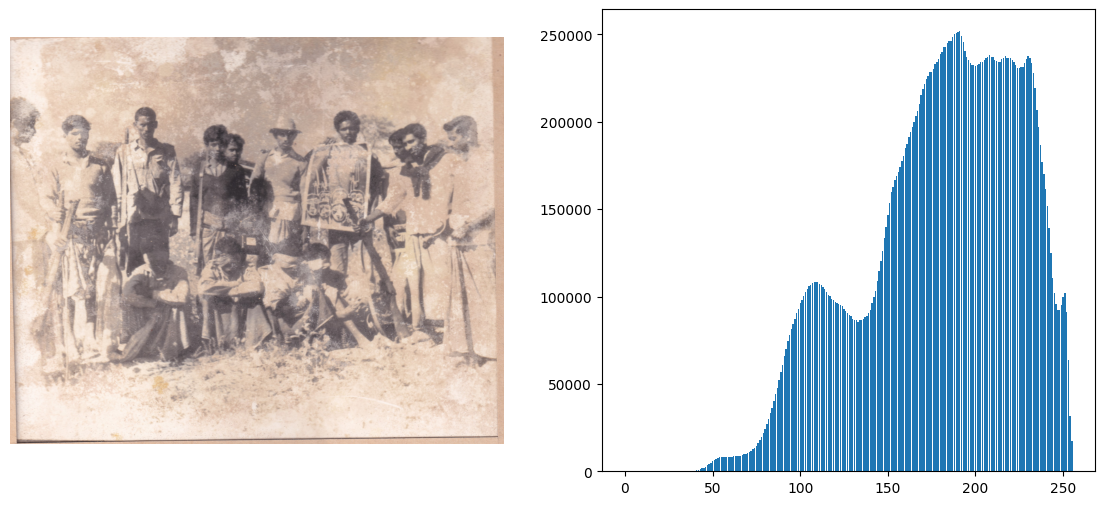

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_img)

<BarContainer object of 256 artists>

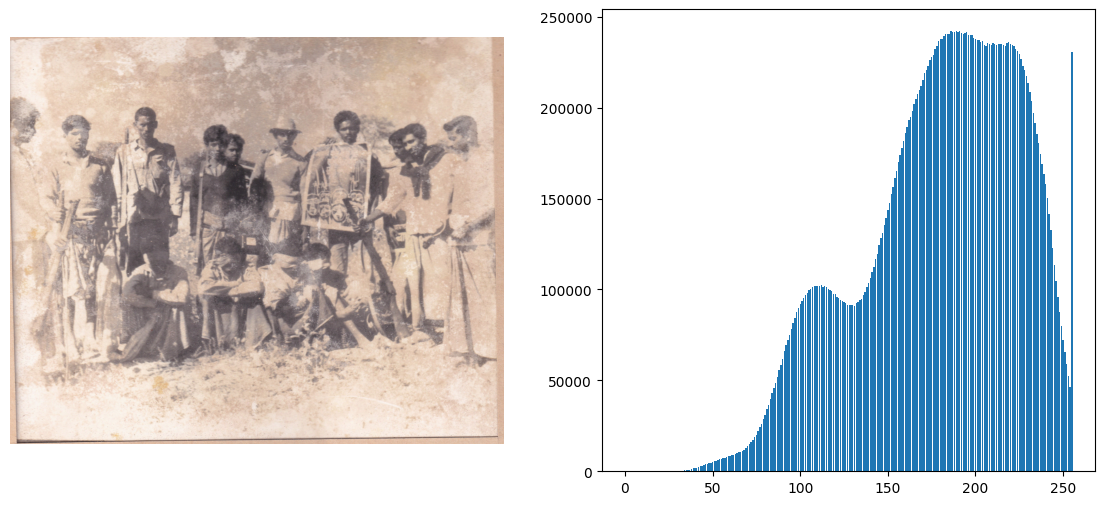

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(img_uni, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_uni)

#print(np.unique(img_uni))

In [10]:
def gaussian_noise(size, mean=0, std=0.01):
    '''
    Generates a matrix with Gaussian noise in the range [0-255] to be added to an image
    
    :param size: tuple defining the size of the noise matrix 
    :param mean: mean of the Gaussian distribution
    :param std: standard deviation of the Gaussian distribution, default 0.01
    :return matrix with Gaussian noise to be added to image
    '''
    noise = np.multiply(np.random.normal(mean, std, size), 255)
    
    return noise

In [11]:
# creating the noise matrix to be added
gau_noise = gaussian_noise(img.shape, mean=0, std=0.05)

# adding and clipping values below 0 or above 255
img_gau = np.clip(img.astype(int)+gau_noise, 0, 255)

hist_gau,_ = np.histogram(img_gau, bins=256, range=(0,255))

<BarContainer object of 256 artists>

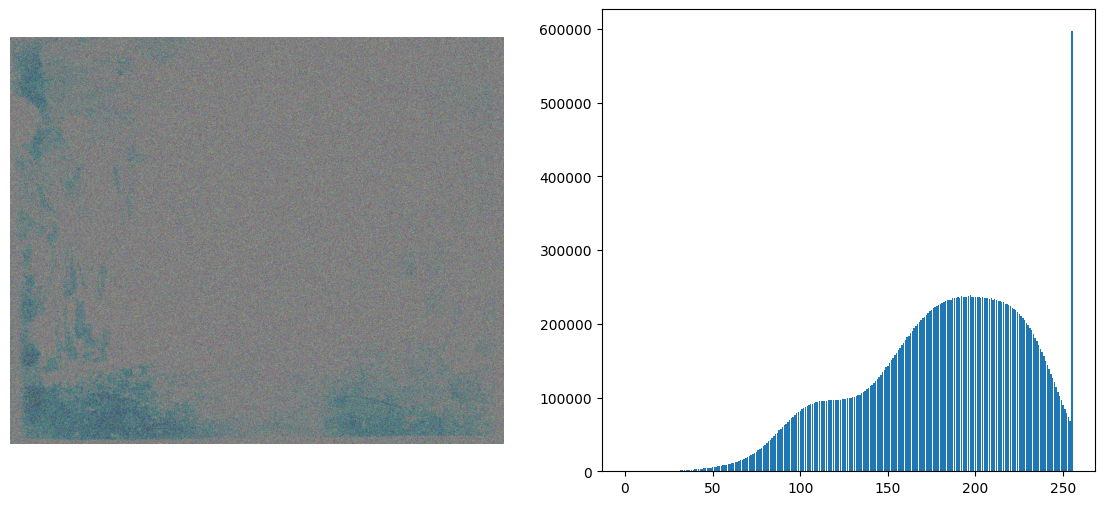

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(121)
#plt.imshow(img_gau, cmap="gray", vmin=0, vmax=255)
plt.imshow((img_gau * 255).astype(np.uint8))
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_gau)

In [16]:
def impulsive_noise(image, prob=0.1, mode='salt_and_pepper'):
    '''
    Returns image with impulsive noise (0 and/or 255) to replace pixels in the image with some probability
    
    :param image: input image
    :param prob: probability for the impulsive noise generation 
    :param mode: type of noise, 'salt', 'pepper' or 'salt_and_pepper' (default)
    :type prob: float
    :return noisy image with impulsive noise
    '''

    noise = np.array(image, copy=True)
    for x in np.arange(image.shape[0]):
        for y in np.arange(image.shape[1]):
            rnd = np.random.random()
            if rnd < prob:
                rnd = np.random.random()
                if rnd > 0.5:
                    noise[x,y] = 255
                else:
                    noise[x,y] = 0
    
    return noise

In [17]:
img_imp = impulsive_noise(img, prob=0.1)

hist_imp,_ = np.histogram(img_imp, bins=256, range=(0,255))

<BarContainer object of 256 artists>

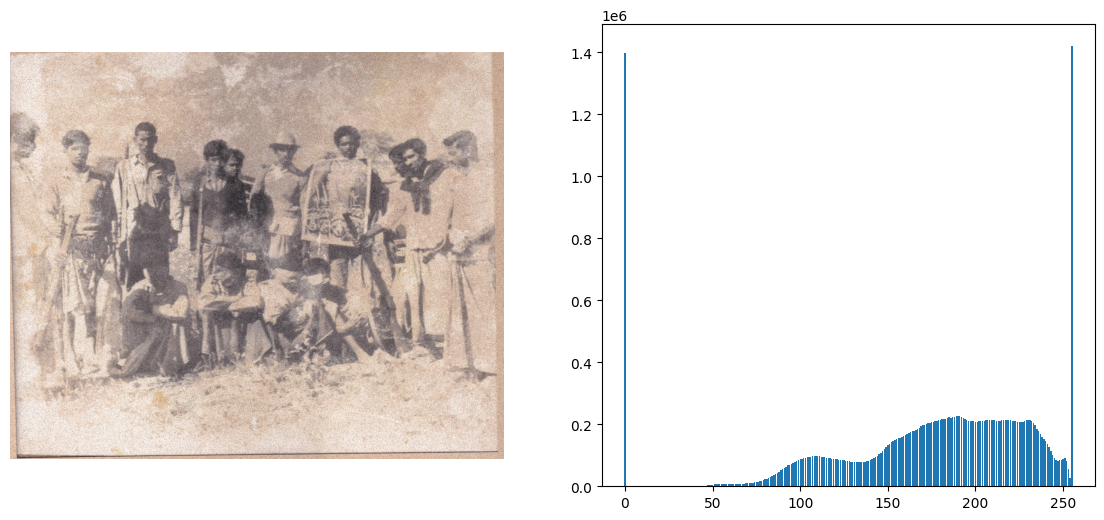

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(img_imp, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_imp)